C:\Users\amarcosv\AppData\Local\Temp\ipykernel_23240\1804383932.py:32: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4, bottom=0.2)
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_23240\1804383932.py:47: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_23240\1804383932.py:49: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.pointplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_23240\1804383932.py:51: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot(ax = axes[3], data

<Axes: xlabel='timestamp_frap_r', ylabel='ref_norm'>

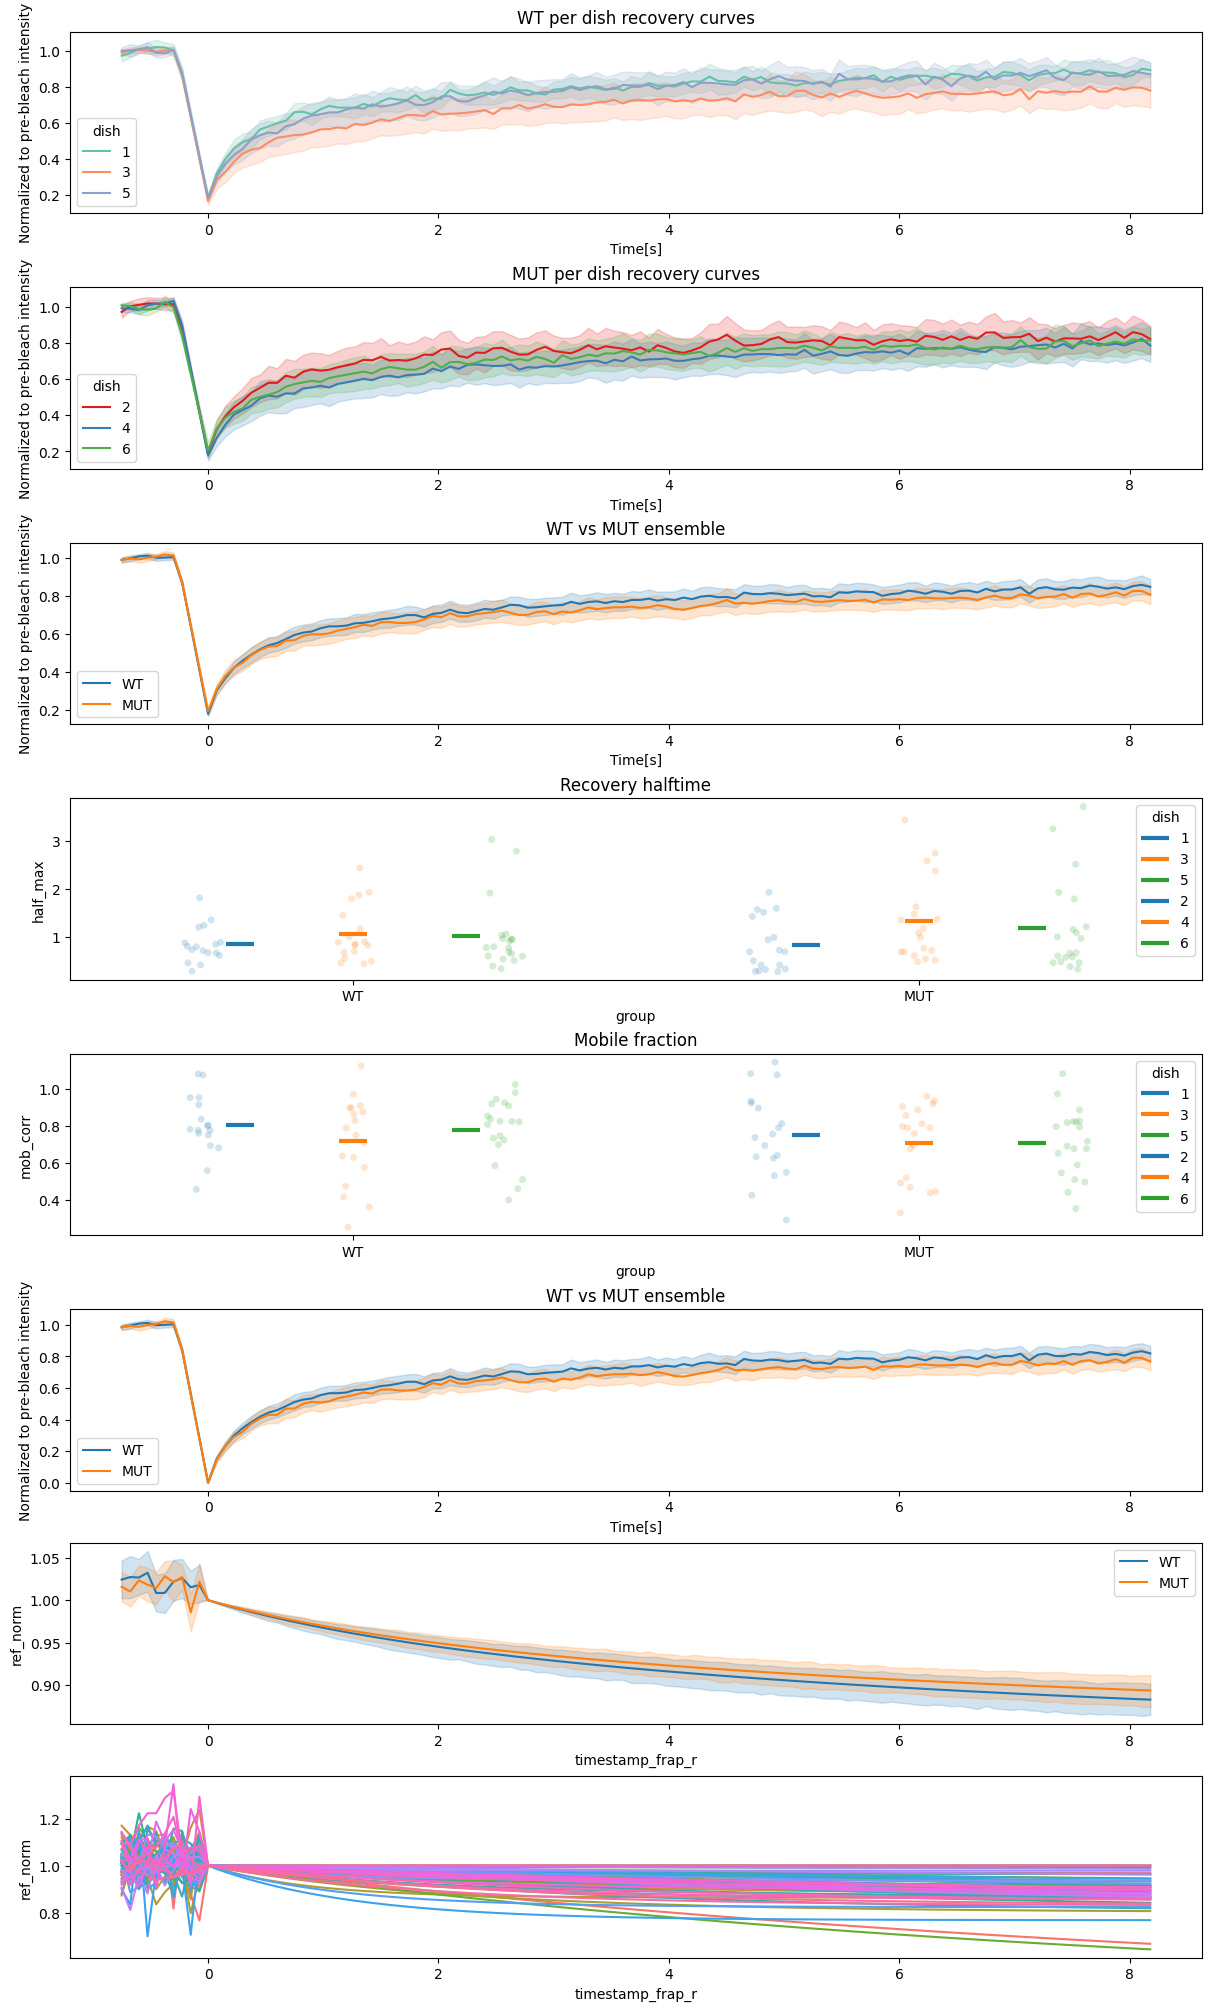

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os

path = "Z:\\Shannon\\20250226_MeCP2\\"
path = "D:\\Projects\\Shannon\\FRAP analysis\\images\\20250115_MeCP2_FRAP_processed"


fileList = [f for f in os.listdir(os.path.join(path))  if f.endswith('.csv')]

for idx, f in enumerate(fileList):
    if "wt" in f.lower():
        if "roiData" in f:
            wt_dataset_roiData_file = f
        elif  "frap_summary" in f:
            wt_dataset_frap_experiment_file = f    
    elif "mut" in f.lower():
        if "roiData" in f:
            mut_dataset_roiData_file = f
        elif  "frap_summary" in f:
            mut_dataset_frap_experiment_file = f   
    
wt_dataset_roiData = pd.read_csv(os.path.join(path, wt_dataset_roiData_file), index_col=False)
mut_dataset_roiData = pd.read_csv(os.path.join(path, mut_dataset_roiData_file), index_col=False)
wt_dataset_frap_experiment  = pd.read_csv(os.path.join(path, wt_dataset_frap_experiment_file), index_col=False)
mut_dataset_frap_experiment = pd.read_csv(os.path.join(path, mut_dataset_frap_experiment_file), index_col=False)



fig, axes = plt.subplots(8, figsize=(12, 20), constrained_layout=True) 
plt.subplots_adjust(hspace=0.4, bottom=0.2)
sns.lineplot(ax = axes[0], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', hue = 'dish', palette="Set2"  )
axes[0].set_title('WT per dish recovery curves')
axes[0].set_ylabel('Normalized to pre-bleach intensity')
axes[0].set_xlabel('Time[s]')
sns.lineplot(ax = axes[1], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', hue = 'dish', palette="Set1" )
axes[1].set_title('MUT per dish recovery curves')
axes[1].set_ylabel('Normalized to pre-bleach intensity')
axes[1].set_xlabel('Time[s]')
sns.lineplot(ax = axes[2], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', label = 'WT')
sns.lineplot(ax = axes[2], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', label = 'MUT' )
axes[2].set_ylabel('Normalized to pre-bleach intensity')
axes[2].set_xlabel('Time[s]')
axes[2].set_title('WT vs MUT ensemble')
#axes[2].legend(['WT','Mut'])
sns.stripplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
sns.stripplot(ax = axes[3], data = mut_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[3], data = mut_dataset_frap_experiment, x="group", y="half_max", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
axes[3].set_title('Recovery halftime')

sns.stripplot(ax = axes[4], data = wt_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[4], data = wt_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
sns.stripplot(ax = axes[4], data = mut_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[4], data = mut_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
axes[4].set_title('Mobile fraction')
sns.lineplot(ax = axes[5], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_fullscale_norm_r', label = 'WT')
sns.lineplot(ax = axes[5], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_fullscale_norm_r', label = 'MUT' )
axes[5].set_ylabel('Normalized to pre-bleach intensity')
axes[5].set_xlabel('Time[s]')
axes[5].set_title('WT vs MUT ensemble')

sns.lineplot(ax = axes[6], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'ref_norm',   label = 'WT')
sns.lineplot(ax = axes[6], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'ref_norm',   label = 'MUT')
sns.lineplot(ax = axes[7], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'ref_norm',   hue = 'file',legend=False)


C:\Users\amarcosv\AppData\Local\Temp\ipykernel_23240\492873993.py:5: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4, bottom=0.2)
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_23240\492873993.py:28: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_23240\492873993.py:30: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.pointplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_23240\492873993.py:32: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot(ax = axes[3], data = mu

' sns.stripplot(ax = axes[4], data = wt_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish",\n    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())\nsns.pointplot(ax = axes[4], data = wt_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish", \ndodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())\nsns.stripplot(ax = axes[4], data = mut_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish",\n    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())\nsns.pointplot(ax = axes[4], data = mut_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish", \ndodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())\naxes[4].set_title(\'Mobile fraction\')\nsns.lineplot(ax = axes[5], data =wt_dataset_roiData, x= \'timestamp_frap_r\', y = \'frap_fullscale_norm_r\', label = \'WT\')\nsns.lineplot(ax = axes[5], dat

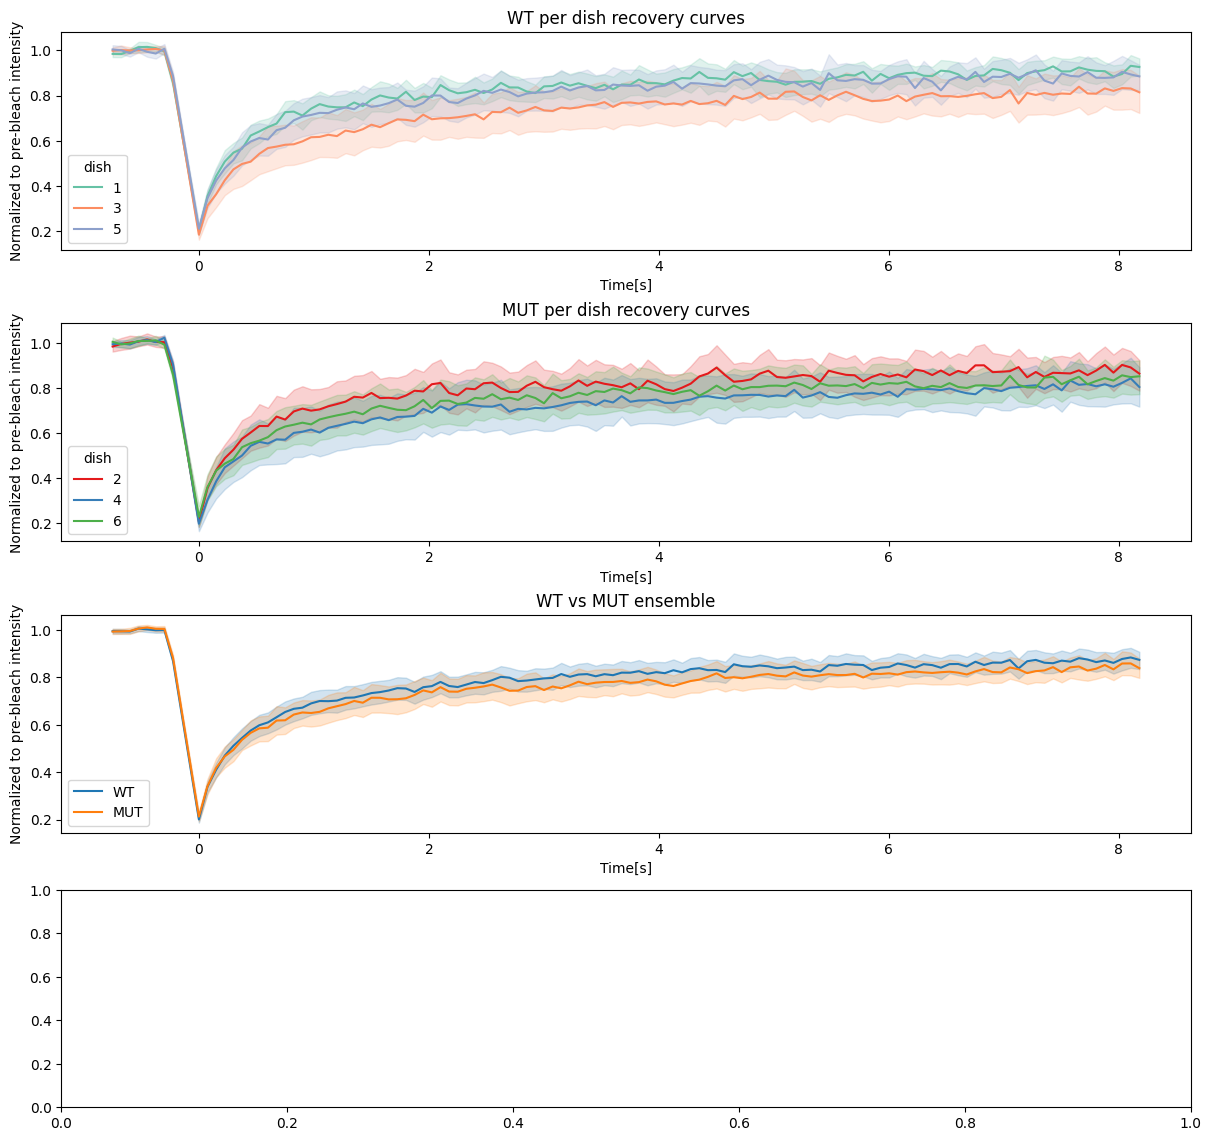

In [9]:
#import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(12, 20))
spec = fig.add_gridspec(8, 3)
#fig, axes = plt.subplots(8, figsize=(12, 20), constrained_layout=True) 
plt.subplots_adjust(hspace=0.4, bottom=0.2)

ax0 = fig.add_subplot(spec[0, :])
sns.lineplot(ax = ax0, data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', hue = 'dish', palette="Set2"  )
ax0.set_title('WT per dish recovery curves')
ax0.set_ylabel('Normalized to pre-bleach intensity')
ax0.set_xlabel('Time[s]')

ax1 = fig.add_subplot(spec[1, :])
sns.lineplot(ax = ax1, data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', hue = 'dish', palette="Set1" )
ax1.set_title('MUT per dish recovery curves')
ax1.set_ylabel('Normalized to pre-bleach intensity')
ax1.set_xlabel('Time[s]')

ax2 = fig.add_subplot(spec[2, :])
sns.lineplot(ax = ax2, data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', label = 'WT')
sns.lineplot(ax = ax2, data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', label = 'MUT' )
ax2.set_ylabel('Normalized to pre-bleach intensity')
ax2.set_xlabel('Time[s]')
ax2.set_title('WT vs MUT ensemble')
#axes[2].legend(['WT','Mut'])
if wt_dataset_frap_experiment['recovery_model'][0].item()==1:
    ax3 = fig.add_subplot(spec[3, :])
    sns.stripplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
        dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
    sns.pointplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish", 
    dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
    sns.stripplot(ax = axes[3], data = mut_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
        dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
    sns.pointplot(ax = axes[3], data = mut_dataset_frap_experiment, x="group", y="half_max", hue = "dish", 
    dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
    axes[3].set_title('Recovery half max')
else:
    ax3_0 = fig.add_subplot(spec[3, 0])
    ax3_1 = fig.add_subplot(spec[3, 1])
    ax3_2 = fig.add_subplot(spec[3, -1])   
    sns.stripplot(ax = ax3_0, data = wt_dataset_frap_experiment, x="group", y="half_max_slow", hue = "dish",
        dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
    sns.pointplot(ax = ax3_0, data = wt_dataset_frap_experiment, x="group", y="half_max_slow", hue = "dish", 
    dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
    sns.stripplot(ax = ax3_0, data = mut_dataset_frap_experiment, x="group", y="half_max_slow", hue = "dish",
        dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
    sns.pointplot(ax = ax3_0, data = mut_dataset_frap_experiment, x="group", y="half_max_slow", hue = "dish", 
    dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
    ax3_0.set_title('Slow recovery half max')
    ax3_0.set(ylim=( 0,1.5))
    ax3_0.get_legend().remove()
    
    sns.stripplot(ax = ax3_1, data = wt_dataset_frap_experiment, x="group", y="half_max_fast", hue = "dish",
        dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
    sns.pointplot(ax = ax3_1, data = wt_dataset_frap_experiment, x="group", y="half_max_fast", hue = "dish", 
    dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
    sns.stripplot(ax = ax3_1, data = mut_dataset_frap_experiment, x="group", y="half_max_fast", hue = "dish",
        dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
    sns.pointplot(ax = ax3_1, data = mut_dataset_frap_experiment, x="group", y="half_max_fast", hue = "dish", 
    dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
    ax3_1.set_title('Fast recovery half max')
    ax3_1.set(ylim=( 0,10))
    ax3_1.get_legend().remove()

    sns.scatterplot(ax = ax3_2, data = wt_dataset_frap_experiment, x="half_max_slow", y="half_max_fast", hue = "dish", style = 'group',
                    palette = sns.color_palette("Blues"))
    sns.scatterplot(ax = ax3_2, data = mut_dataset_frap_experiment, x="half_max_slow", y="half_max_fast", hue = "dish", style = 'group'
                    , palette = sns.color_palette("Reds"))
    ax3_2.set_title('Distribution of half max')
    ax3_2.set(xlim=( 0,1.5))
    ax3_2.set(ylim=( 0,10))


""" sns.stripplot(ax = axes[4], data = wt_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[4], data = wt_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
sns.stripplot(ax = axes[4], data = mut_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[4], data = mut_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
axes[4].set_title('Mobile fraction')
sns.lineplot(ax = axes[5], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_fullscale_norm_r', label = 'WT')
sns.lineplot(ax = axes[5], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_fullscale_norm_r', label = 'MUT' )
axes[5].set_ylabel('Normalized to pre-bleach intensity')
axes[5].set_xlabel('Time[s]')
axes[5].set_title('WT vs MUT ensemble')

sns.lineplot(ax = axes[6], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'ref_norm',   label = 'WT')
sns.lineplot(ax = axes[6], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'ref_norm',   label = 'MUT')
sns.lineplot(ax = axes[7], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'ref_norm',   hue = 'file',legend=False) """
